wikipedia explanation of momemtum is greaat!

**The figures included in this tutorial are from:**


*   medium
*   geekforgeeks
*   stackoverflow
*   paperswithcode



some references to understand gradient descent:


*   https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/#:~:text=Momentum%20is%20an%20extension%20to,spots%20of%20the%20search%20space.

*   https://ruder.io/optimizing-gradient-descent/index.html#momentum




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

**data reading**

In [ ]:
data=pd.read_csv('advertising.csv')

In [ ]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


**data scaling**

data scaling is one of the most important data pre-processing steps that we must do in case the problem features (columns) are not on the same scale.

we use the Min-Max scaler to scale our data

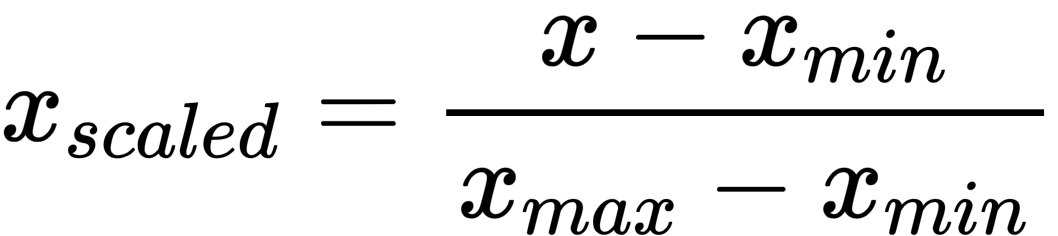

In [ ]:

X=np.array(data.drop(['Sales'],axis=1))
Y=np.array(data[['Sales']])

X_scaled=(X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
Y_scaled=(Y - Y.min(axis=0)) / (Y.max(axis=0) - Y.min(axis=0))

# batch gradient descent

initialization

In [ ]:
#initialization
weight=np.random.rand(4,1)

#initialization of variable 'new_weights' (to store new weights after update of the weights)
new_weight=weight

hyperparameters

In [ ]:

#number of training epochs
#an epoch is the cycle of training the model on ALL the observations of the training set.
# 1 epoch = N iterations,   where N is the number of training examples
n_epochs=100

#learning_rate for gradient descent
alpha=0.01

#eps: error tolerance
eps=0.000001



other initializations

In [ ]:
#number of training examples
n_training_examples=data.shape[0]

#to store the loss function values
loss=[]

In [ ]:
#add the ones' column in input matrix X_scaled
X_scaled=np.c_[X_scaled,np.ones(X_scaled.shape[0])]

#boolean variable which switches to True when we achieve the optimal weight
find=False

the cost function we use in this tutorial is MSE (Mean-Squared Error)

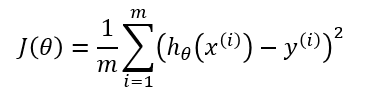

we apply gradient descent in order to get as closer as possible to the optimal weights. An update of the weight theta_j is calculated as follows

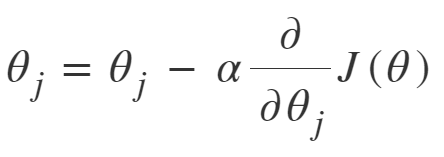

where: alpha is the learning rate, i.e. the step size, as shown in the figure below. The step size tells how far the weight has to move against the gradient.

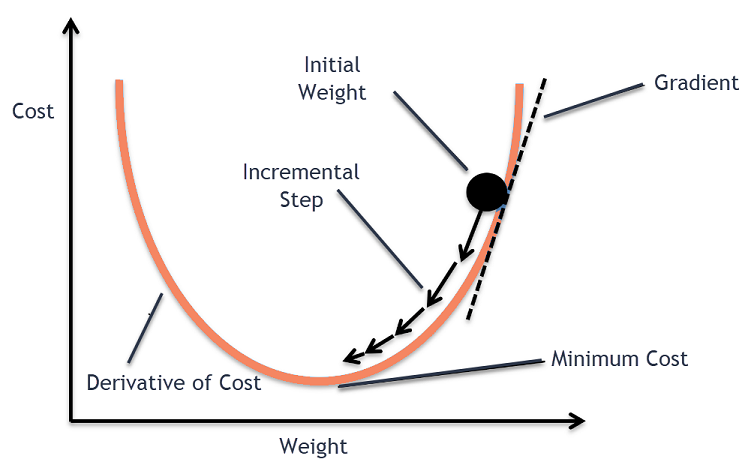

the algorithm ensures that the weight is moving against the gradient, i.e.


*   if the loss function is increasing the weight decreases.
*   if the loss function is decreasing the weight increases.



we repeat the weights' update process until convergence

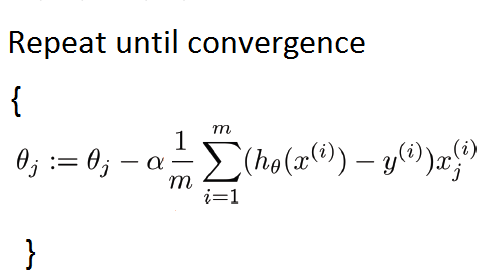

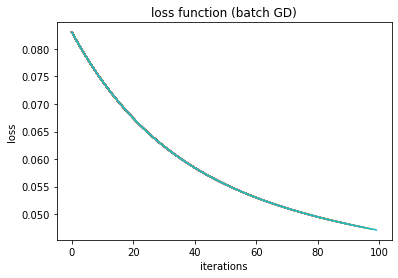

In [ ]:

plt.figure()
plt.title('loss function (batch GD)')
plt.xlabel('iterations')
plt.ylabel('loss')
st = time.process_time()
for i in range(n_epochs):
  #initialize cost function and cost gradient
  cost=0
  deriv_loss=np.zeros(X_scaled.shape[1]).reshape(X_scaled.shape[1],1)
  for j in range(n_training_examples):
    #feedforward: computation of prediction
    sales_pred=np.dot(X_scaled[j],weight)
    #computation of loss function
    cost+=1/(2*n_training_examples)*(sales_pred-Y_scaled[j])**2
    #computation of derivative of loss function(MSE) with respect to every parameter
    for k in range(X_scaled.shape[1]):
      deriv_loss[k]+=-1/n_training_examples*X_scaled[j,k]*(Y_scaled[j]-sales_pred)

    #computation of derivative of sales_pred with respect to weights and bias
  loss.append(cost)

    #backward: update of weights and bias using chain rule
  new_weight=weight-alpha*deriv_loss

  if np.sum((new_weight-weight)**2)<eps:
    find=True
    weight=new_weight
    break
  if find==True:
    break
  weight=new_weight
  plt.plot(loss)

et = time.process_time()

results depend on initialization of weights and learning rate. You can play on these parameters to see this effect.

In [ ]:
res = et - st
print(res)

0.6743241490000003


In [ ]:
weight

array([[ 0.0557267 ],
       [ 0.6883018 ],
       [ 0.88483503],
       [-0.01332086]])

**compute the RMSE (root mean squared error) of the model in order to assess its accuracy**

In [ ]:
final_predictions=[]
RMSE=0

In [ ]:
for i in range(n_training_examples):
  #scaled prediction
  final_predictions.append(np.dot(X_scaled[j],weight))
  #inverse the scaling: return to original scale
  final_predictions[i]=final_predictions[i]*(max(Y)-min(Y))+min(Y)
  #update the RMSE
  RMSE+=1/n_training_examples*(final_predictions[i]-Y[i])**2

RMSE**0.5

array([9.63827234])

# stochastic gradient descent

initialization

In [ ]:
weight=np.random.rand(4,1)
new_weight=weight

In [ ]:

#number of training epochs
n_epochs=100

#learning_rate for gradient descent
alpha=0.01

#eps: error tolerance
eps=0.000001



other initializations

In [ ]:
#number of training examples
n_training_examples=data.shape[0]
#to store the loss function values
loss=[]

In [ ]:
#boolean variable: detect the convergence of the optimization algorithm

find=False

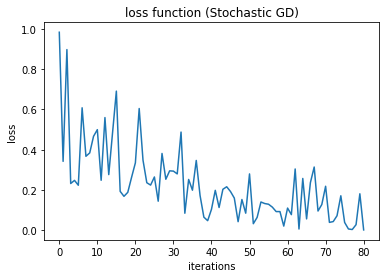

In [ ]:
plt.figure()
plt.title('loss function (Stochastic GD)')
plt.xlabel('iterations')
plt.ylabel('loss')
st = time.process_time()
for i in range(n_epochs):
  #shuffle the dataset to impose randomness of the input
  data=data.sample(frac=1)
  X=np.array(data.drop(['Sales'],axis=1))
  Y=np.array(data[['Sales']])

  X_scaled=(X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
  Y_scaled=(Y - Y.min(axis=0)) / (Y.max(axis=0) - Y.min(axis=0))

  X_scaled=np.c_[X_scaled,np.ones(X_scaled.shape[0])]

  deriv_loss=np.zeros(X_scaled.shape[1]).reshape(X_scaled.shape[1],1)


  for j in range(n_training_examples):
    #feedforward: computation of prediction
    sales_pred=np.dot(X_scaled[j],weight)
    #computation of loss function
    loss.append(1/2*(sales_pred-Y_scaled[j])**2)
    #computation of derivative of loss function(MSE) with respect to weights and bias
    for k in range(X_scaled.shape[1]):
      deriv_loss[k]=-X_scaled[j,k]*(Y_scaled[j]-sales_pred)

    #backward: update of weights and bias
    new_weight=weight-alpha*deriv_loss

    if np.sum((new_weight-weight)**2)<eps:
      weight=new_weight
      #plt.plot(loss)
      find=True
      break
    weight=new_weight
  plt.plot(loss)
  if find==True:
    break

et = time.process_time()


In [ ]:
res = et - st
print(res)

0.005350892999999246




* 1st run: converged in 90 iterations.
* 2nd run: converged in 84 iterations.

----> convergence speed depends on data shuffling and initialization of weights.


In [ ]:
weight

array([[0.27111713],
       [0.57748356],
       [0.10491813],
       [0.39454594]])

In [ ]:
final_predictions=[]
RMSE=0

In [ ]:
for i in range(n_training_examples):
  #scaled prediction
  final_predictions.append(np.dot(X_scaled[j],weight))
  #inverse the scaling: return to original scale
  final_predictions[i]=final_predictions[i]*(max(Y)-min(Y))+min(Y)
  #update the RMSE
  RMSE+=1/n_training_examples*(final_predictions[i]-Y[i])**2

RMSE**0.5

array([6.85872999])

# mini-batch gradient descent

In [ ]:
#initialize the weights
weight=np.random.rand(4,1)

new_weight=weight

hyperparameters

In [ ]:

#number of training epochs
n_epochs=100

#learning_rate for gradient descent
alpha=0.01

#eps: error tolerance
eps=0.000001

#batch size
m=10

other initializations

In [ ]:
#number of training examples
n_training_examples=data.shape[0]
#to store the loss function values
loss=[]

In [ ]:
X=np.array(data.drop(['Sales'],axis=1))
Y=np.array(data[['Sales']])

X_scaled=(X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
Y_scaled=(Y - Y.min(axis=0)) / (Y.max(axis=0) - Y.min(axis=0))

In [ ]:

X_scaled=np.c_[X_scaled,np.ones(X_scaled.shape[0])]
find=False

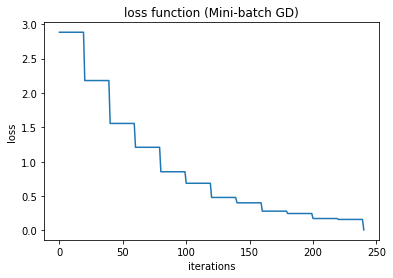

In [ ]:
plt.figure()
plt.title('loss function (Mini-batch GD)')
plt.xlabel('iterations')
plt.ylabel('loss')
st=time.process_time()
for i in range(n_epochs):
  k=0
  cost=0

  deriv_loss=np.zeros(X_scaled.shape[1]).reshape(X_scaled.shape[1],1)
  while (k<n_training_examples):
    #we go mini-batch by mini-batch
    for j in range(k,k+m):
      #feedforward: computation of prediction
      sales_pred=np.dot(X_scaled[j],weight)
      #computation of loss function
      cost+=1/(2*m)*(sales_pred-Y_scaled[j])**2
      #computation of derivative of loss function(MSE) with respect to every parameter

      for u in range(X_scaled.shape[1]):
        deriv_loss[u]+=-1/m*X_scaled[j,u]*(Y_scaled[j]-sales_pred)

      #computation of derivative of sales_pred with respect to weights and bias
    loss.append(cost)
      #backward: update of weights and bias using chain rule

    new_weight=weight-alpha*deriv_loss
    if np.sum((new_weight-weight)**2)<eps:
      find=True
      weight=new_weight
      break
    if find==True:
      k=n_training_examples
    weight=new_weight
    k+=m
  if find==True:
    break

et=time.process_time()
plt.plot(loss)

converges in approximately int(361/20)=18 epochs which is more than SGD and much less than BGD.

In [ ]:
res=et-st
print(res)

0.1472465370000009


In [ ]:
weight

array([[0.56495319],
       [0.12785793],
       [0.26408686],
       [0.23711371]])

In [ ]:
final_predictions=[]
RMSE=0

In [ ]:
for i in range(n_training_examples):
  #normalized prediction
  final_predictions.append(np.dot(X_scaled[j],weight))
  #rescale the prediction
  final_predictions[i]=final_predictions[i]*(max(Y)-min(Y))+min(Y)
  RMSE+=1/n_training_examples*(final_predictions[i]-Y[i])**2

RMSE**0.5

array([6.79546577])

# **comparison of results**

*     the different algorithms are close in terms of accuracy. But the results differ depending on the parameters and hyperparameters' values (initialization of weights, number of epochs, learning rate).

*     SGD loss function shows **more variation** comparing with batch and mini-batch algorithms' loss function. This is obvious because for SGD the loss function is computed per observation so it can happen to compute the loss of some noise. Contrary to batch and mini-bathc algorithms which use the entire and a subset of the dataset respectively. That's why their loss functions are smoother.

*     ranking of the algorithms in terms of "least computation time":
1-batch gradient descent: it updates the parameters just once per epoch.
2-mini-batch gradient descent: updates the parameters int(N/m) times, where N is the number of training examples and m is the batch size.
3-stochastic gradient descent: it updates the parameters in each iteration, so N times per epoch where N is the number of observations.

*     ranking of the algorithms in terms of "least computation cost":
1-stochastic gradient descent: because it uses a single observation to update the parameters and calculate the loss function.
2-mini-batch GD
3-batch GD




# SGD with momentum

motivation for GD with momentum, see:


*   https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/#:~:text=Momentum%20is%20an%20extension%20to,spots%20of%20the%20search%20space. (intro)
*   https://ruder.io/optimizing-gradient-descent/index.html#momentum



the aim of momentum can be:


*   to accelerate the optimisation algorithm, i.e. decrease the number of iterations, as shown in the fig below.
*   to improve the accuracy of the solution.





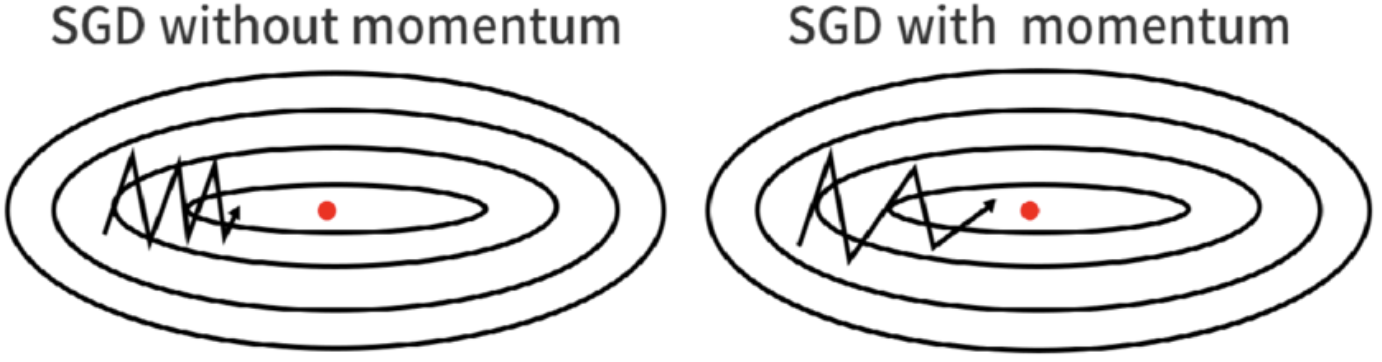

the idea of momentum is to consider the history of a weight's change. i.e. the change_t = alpha \times gradient+beta \times change_(t-1)

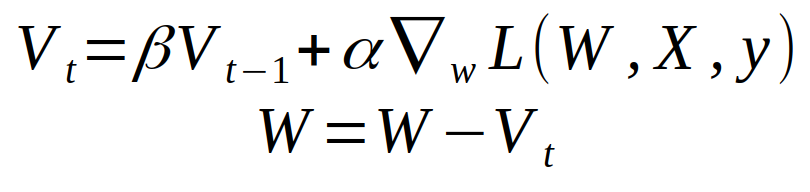

*  beta \in [0,1]
*  the bigger is beta the higher is the dependence on the previous weights' change, i.e. the more we are learning from past :)

momentum is highly useful in optimization problems where the curvature varies a lot or where the gradient is noisy.

the momentum decreases the oscillation, as shown in the figure above the previous formula.

**we are going to repeat the same implementation of SGD seen earlier but with addition of a momentum term and we observe the effect.**

In [ ]:
weight=np.random.rand(4,1)
new_weight=weight

In [ ]:

#number of training epochs
n_epochs=100

#learning_rate for gradient descent
alpha=0.01

#eps: error tolerance
eps=0.000001

#the momentum term
#usually we choose the value 0.9, but we recommend you play with this hyperparameter and see the effect.
momentum=0.9

other initializations

In [ ]:
#number of training examples
n_training_examples=data.shape[0]
#to store the loss function values
loss=[]

In [ ]:


find=False

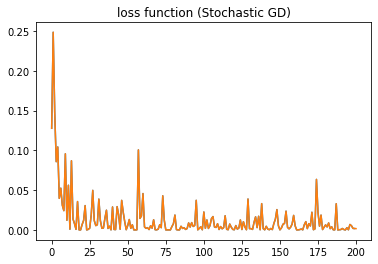

In [ ]:
plt.figure()
plt.title('loss function (Stochastic GD)')
for i in range(n_epochs):
  #shuffle the dataset to impose randomness of the input
  data=data.sample(frac=1)
  X=np.array(data.drop(['Sales'],axis=1))
  Y=np.array(data[['Sales']])

  X_scaled=(X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
  Y_scaled=(Y - Y.min(axis=0)) / (Y.max(axis=0) - Y.min(axis=0))

  X_scaled=np.c_[X_scaled,np.ones(X_scaled.shape[0])]

  deriv_loss=np.zeros(X_scaled.shape[1]).reshape(X_scaled.shape[1],1)

  #initialize the change
  change=np.zeros(X_scaled.shape[1]).reshape(X_scaled.shape[1],1)

  for j in range(n_training_examples):
    #feedforward: computation of prediction
    sales_pred=np.dot(X_scaled[j],weight)
    #computation of loss function
    loss.append(1/2*(sales_pred-Y_scaled[j])**2)
    #computation of derivative of loss function(MSE) with respect to weights and bias
    for k in range(X_scaled.shape[1]):
      deriv_loss[k]=-X_scaled[j,k]*(Y_scaled[j]-sales_pred)
    new_change=alpha*deriv_loss+momentum*change
    #backward: update of weights and bias
    new_weight=weight-new_change

    if np.sum((new_weight-weight)**2)<eps:
      weight=new_weight
      #plt.plot(loss)
      find=True
      break
    change=new_change
    weight=new_weight

  plt.plot(loss)
  if find==True:
    break



the momentum SGD accelerates the convergence to the optimal solution.

**if we compare SGD and SGD with momentum loss functions we clearly see that the momentum decreases the variation of the loss function, thus speeds up the convergence.**

suggestion: you can play with the momentum value and see the effect.

In [ ]:
len(loss)

201

In [ ]:
weight

array([[0.57438178],
       [0.06681298],
       [0.37426321],
       [0.08484317]])

In [ ]:
#initialize the vector of predictions
final_predictions=[]
#initialize the RMSE
RMSE=0

In [ ]:
for i in range(n_training_examples):
  #normalized prediction
  final_predictions.append(np.dot(X_scaled[j],weight))
  #rescale the prediction
  final_predictions[i]=final_predictions[i]*(max(Y)-min(Y))+min(Y)
  #update the RMSE
  RMSE+=1/n_training_examples*(final_predictions[i]-Y[i])**2

RMSE**0.5

array([6.2111066])